## Callin Switzer
## Create figure 3 for poster (Moth trajectory actual vs. predicted)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
from datetime import datetime
import sys
import csv
import seaborn as sns
sns.set(style="ticks")
import scipy.io
import subprocess
import csv

import tensorflow as tf
print("TensorFlow successfully installed.")
if tf.test.is_built_with_cuda():
    print("The installed version of TensorFlow includes GPU support.")

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

#%qtconsole

# define directories
baseDir = os.getcwd()
dataDir = r'D:\MothSimulations\11c-AggressiveManeuver\Qstore\hws_am_con'
figDir = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\Figs'
dataOutput = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\DataOutput'
savedModels = r'D:\Dropbox\AcademiaDropbox\mothMachineLearning_dataAndFigs\savedModels'
randomRawData = r'D:/Dropbox/AcademiaDropbox/mothMachineLearning_dataAndFigs/PythonGeneratedData'

if not os.path.exists(dataOutput):
    os.mkdir(dataOutput)
if not os.path.exists(savedModels):
    os.mkdir(savedModels)


C:\Users\calli\Anaconda3\envs\deeplearning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2019-01-01 22:40:31.317645


In [2]:
# import custom Utils functions
from DeepLearningUtils import *

TensorFlow successfully installed.
The installed version of TensorFlow includes GPU support.
3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)] 

last run on 2019-01-01 22:40:31.324601


In [3]:
predDF_small = pd.read_csv(os.path.join(dataOutput, "PathVals_output_small.csv"))
pd.set_option('display.max_columns', 500)
predDF_small.head()

,x_0,y_0,phi_0,theta_0,x_99,y_99,phi_99,theta_99,x_dot_0,y_dot_0,phi_dot_0,theta_dot_0,x_dot_99_pred,y_dot_99_pred,phi_dot_99_pred,theta_dot_99_pred,F_pred,alpha_pred,tau_pred,x_importedICs,y_importedICs,phi_importedICs,theta_importedICs,x_dot_importedICs,y_dot_importedICs,phi_dot_importedICs,theta_dot_importedICs,x_adjustedICs,y_adjustedICs,phi_adjustedICs,theta_adjustedICs,x_dot_adjustedICs,y_dot_adjustedICs,phi_dot_adjustedICs,theta_dot_adjustedICs,Unnamed: 35
0,0,0.0000,3.927,0.7854,0,2.4869,3.927,0.7854,0.0001,0.0001,0.00000,0.00000,-2.8484,245.380,0.88877,0.32162,15007.0,0.80969,-6544.100,-0.063569,2.5271,3.9474,0.79549,-6.5301,252.3600,2.00120,1.49380,-0.063569,2.5271,3.9474,0.79549,-6.5301,252.3600,2.00120,1.49380,NaN
1,0,2.4869,3.927,0.7854,0,4.8175,3.927,0.7854,-2.8484,245.3800,0.88877,0.32162,4.7954,-9.356,-0.81235,-0.80042,12751.0,3.96500,-419.850,0.036799,4.8824,3.9271,0.78571,6.2260,-5.4604,-0.84788,-0.83494,-0.060163,5.0649,3.9700,0.81836,7.4591,1.7974,0.29155,0.30425,NaN
2,0,4.8175,3.927,0.7854,0,6.8455,3.927,0.7854,4.7954,-9.3560,-0.81235,-0.80042,-2.6972,206.810,0.90973,0.79663,13202.0,0.82697,-728.060,0.009996,6.8252,3.9286,0.78506,-3.7230,210.0200,0.96472,0.86867,-0.093209,7.2902,3.9934,0.83987,-11.5410,220.5600,2.04470,1.96600,NaN
3,0,6.8455,3.927,0.7854,0,8.4433,3.927,0.7854,-2.6972,206.8100,0.90973,0.79663,4.3613,-43.363,-0.80469,-0.80674,12513.0,3.96210,-734.000,0.026971,8.5182,3.9284,0.78663,5.3840,-39.4450,-0.76182,-0.77175,-0.102720,9.2476,4.0178,0.86411,11.4560,-24.6550,0.40194,0.39191,NaN
4,0,8.4433,3.927,0.7854,0,9.5106,3.927,0.7854,4.3613,-43.3630,-0.80469,-0.80674,-1.2909,146.050,0.80564,0.75402,11613.0,0.82262,-36.778,0.021379,9.4830,3.9265,0.78402,-2.1515,147.2900,0.74844,0.71037,-0.121320,10.6480,4.0412,0.88661,-14.0690,164.5400,1.92950,1.89960,NaN


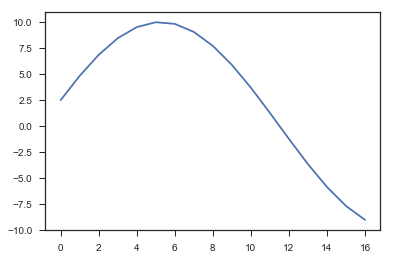

In [4]:
plt.plot(predDF_small.y_99)

In [5]:
# add timestep
predDF_small["timestep"] = np.arange(0.02, 0.02*18, step = 0.02)

In [6]:
predDF_small.columns

Index(['x_0', 'y_0', 'phi_0', 'theta_0', 'x_99', 'y_99', 'phi_99', 'theta_99',
       'x_dot_0', 'y_dot_0', 'phi_dot_0', 'theta_dot_0', 'x_dot_99_pred',
       'y_dot_99_pred', 'phi_dot_99_pred', 'theta_dot_99_pred', 'F_pred',
       'alpha_pred', 'tau_pred', 'x_importedICs', 'y_importedICs',
       'phi_importedICs', 'theta_importedICs', 'x_dot_importedICs',
       'y_dot_importedICs', 'phi_dot_importedICs', 'theta_dot_importedICs',
       'x_adjustedICs', 'y_adjustedICs', 'phi_adjustedICs',
       'theta_adjustedICs', 'x_dot_adjustedICs', 'y_dot_adjustedICs',
       'phi_dot_adjustedICs', 'theta_dot_adjustedICs', 'Unnamed: 35',
       'timestep'],
      dtype='object')

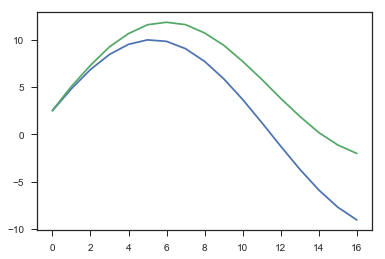

In [7]:
plt.plot(predDF_small.y_99)
plt.plot(predDF_small.y_adjustedICs)


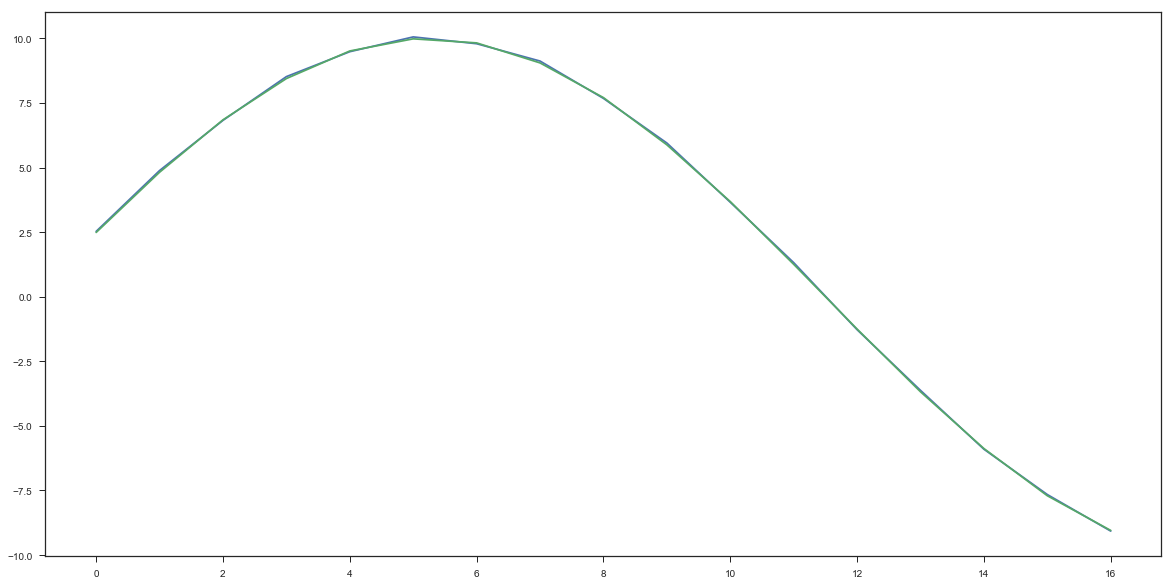

In [8]:
plt.figure(figsize = [20,10])
plt.plot(predDF_small.y_importedICs)
plt.plot(predDF_small.y_99)

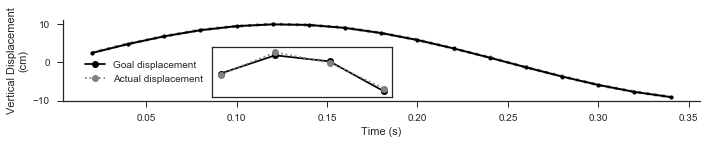

In [9]:
f, (ax ) = plt.subplots(1, 1, sharey=False, figsize=np.array([20,4]) / 2)



ax.plot(predDF_small.timestep, predDF_small.y_importedICs, c= "grey", linewidth = 3, linestyle = ":", marker = "o", markersize = 4)
ax.plot(predDF_small.timestep, predDF_small.y_99, c= "black", linewidth = 2, linestyle = "-", marker = 'o', markersize = 4)
ax.set_ylabel("Vertical Displacement\n(cm)")
ax.set_xlabel("Time (s)")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
f.tight_layout()


#ax.axes.get_xaxis().set_ticks([])
#ax.plot([0, 0.001], [0, 1], 'k-')
interval = np.arange(4, 8)

a = plt.axes([0.3, 0.35, .25, .35], facecolor='w') 
plt.plot(predDF_small.timestep[interval], predDF_small.y_99[interval], color = 'black', linestyle = "-" , label = 'Goal displacement', marker = 'o')
plt.plot(predDF_small.timestep[interval], predDF_small.y_importedICs[interval], color = 'grey', linestyle = ":", label = "Actual displacement", marker = "o" )
plt.legend(bbox_to_anchor=(0., 0.9))
plt.ylim([8.9, 10.2])
#plt.title('Zoomed View')
#plt.xlim(0, 0.2)
plt.xticks([])
plt.yticks([])


plt.show()

f.savefig(os.path.join(figDir, "PartialTrajectory.svg"))


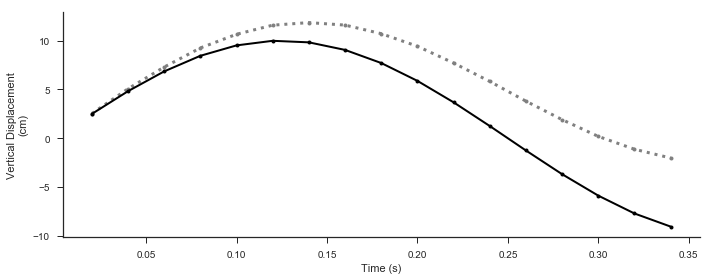

In [10]:
f, (ax ) = plt.subplots(1, 1, sharey=False, figsize=np.array([20,8]) / 2)



ax.plot(predDF_small.timestep, predDF_small.y_adjustedICs, c= "grey", linewidth = 3, linestyle = ":", marker = "o", markersize = 4)
ax.plot(predDF_small.timestep, predDF_small.y_99, c= "black", linewidth = 2, linestyle = "-", marker = 'o', markersize = 4)
ax.set_ylabel("Vertical Displacement\n(cm)")
ax.set_xlabel("Time (s)")
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
f.tight_layout()


plt.show()

f.savefig(os.path.join(figDir, "PartialTrajectory2.svg"))
